In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Organoid Segmentation

This notebook assumes that the two images `D007T01P005L08_G_16_contrastProjections.h5` and `D013T01P907L08_P_02_contrastProjections.h5` can be found in the `./io` directory.

## Build Docker Image

In [2]:
!bash ./build-docker-image.sh

Sending build context to Docker daemon   2.37MB
Step 1/15 : FROM nvidia/cuda:11.3.1-cudnn8-runtime-ubuntu18.04
 ---> 8ccbfebdd991
Step 2/15 : RUN apt update && apt upgrade -y && apt install -y software-properties-common
 ---> Using cache
 ---> 3559fb263c92
Step 3/15 : RUN add-apt-repository ppa:deadsnakes/ppa -y &&     apt update &&     apt install -y     python3.6     python3.6-dev     python3.6-venv     python3-distutils     ffmpeg     libsm6     libxext6     libxrender-dev     wget     gcc     gnupg
 ---> Using cache
 ---> 1aba8a3765ff
Step 4/15 : RUN rm -rf /var/lib/apt/lists/* /tmp/* /var/tmp/*
 ---> Using cache
 ---> 9232f641460c
Step 5/15 : ENV VIRTUALENV=/.venv/myenv
 ---> Using cache
 ---> ba71cb2fc1bc
Step 6/15 : RUN python3.6 -m venv $VIRTUALENV
 ---> Using cache
 ---> 59d541d031aa
Step 7/15 : ENV PATH=$VIRTUALENV/bin:$PATH
 ---> Using cache
 ---> 20225ccb5c0b
Step 8/15 : RUN pip install -U pip wheel
 ---> Using cache
 ---> 38641bc015bd
Step 9/15 : RUN pip install     tensor

## Run AI Segmentation

In [3]:
!bash ./run-inference.sh

[INFO] 02/28/2022 10:34:53 :: Running inference on 2 images.
[INFO] 02/28/2022 10:34:53 :: Running inference on image at '/io/D007T01P005L08_G_16_contrastProjections.h5'.
[DEBUG] 02/28/2022 10:34:53 :: (/io/D007T01P005L08_G_16_contrastProjections.h5) Loading image from disk ...
[DEBUG] 02/28/2022 10:34:53 :: (/io/D007T01P005L08_G_16_contrastProjections.h5) Running preprocessing ...
[DEBUG] 02/28/2022 10:34:58 :: (/io/D007T01P005L08_G_16_contrastProjections.h5) Loading model and generating predictions ...
2022-02-28 10:34:58.359985: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-02-28 10:34:58.360006: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-28 10:34:58.360026: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc

## Display Outputs

In [4]:
def show_image_fields(filename):
    with h5py.File(filename, "r") as h5handle:
        img = h5handle["images"][()]

    # Normalize
    img = (img - img.min()) / (img.max() - img.min())

    fig, ax = plt.subplots(2, 2, figsize=(16, 16))
    ax[0][0].imshow(img[0].transpose((1, 2, 0)))
    ax[0][0].axis(False)
    ax[0][1].imshow(img[1].transpose((1, 2, 0)))
    ax[0][1].axis(False)
    ax[1][0].imshow(img[2].transpose((1, 2, 0)))
    ax[1][0].axis(False)
    ax[1][1].imshow(img[3].transpose((1, 2, 0)))
    ax[1][1].axis(False)
    fig.tight_layout()

In [5]:
def show_segmentation_fields(filename):
    with h5py.File(filename, "r") as h5handle:
        img = h5handle["mask"][()]

    fig, ax = plt.subplots(2, 2, figsize=(16, 16))
    ax[0][0].imshow(img[0])
    ax[0][0].axis(False)
    ax[0][1].imshow(img[1])
    ax[0][1].axis(False)
    ax[1][0].imshow(img[2])
    ax[1][0].axis(False)
    ax[1][1].imshow(img[3])
    ax[1][1].axis(False)
    fig.tight_layout()

### D007T01P005L08_G_16

#### Image Fields

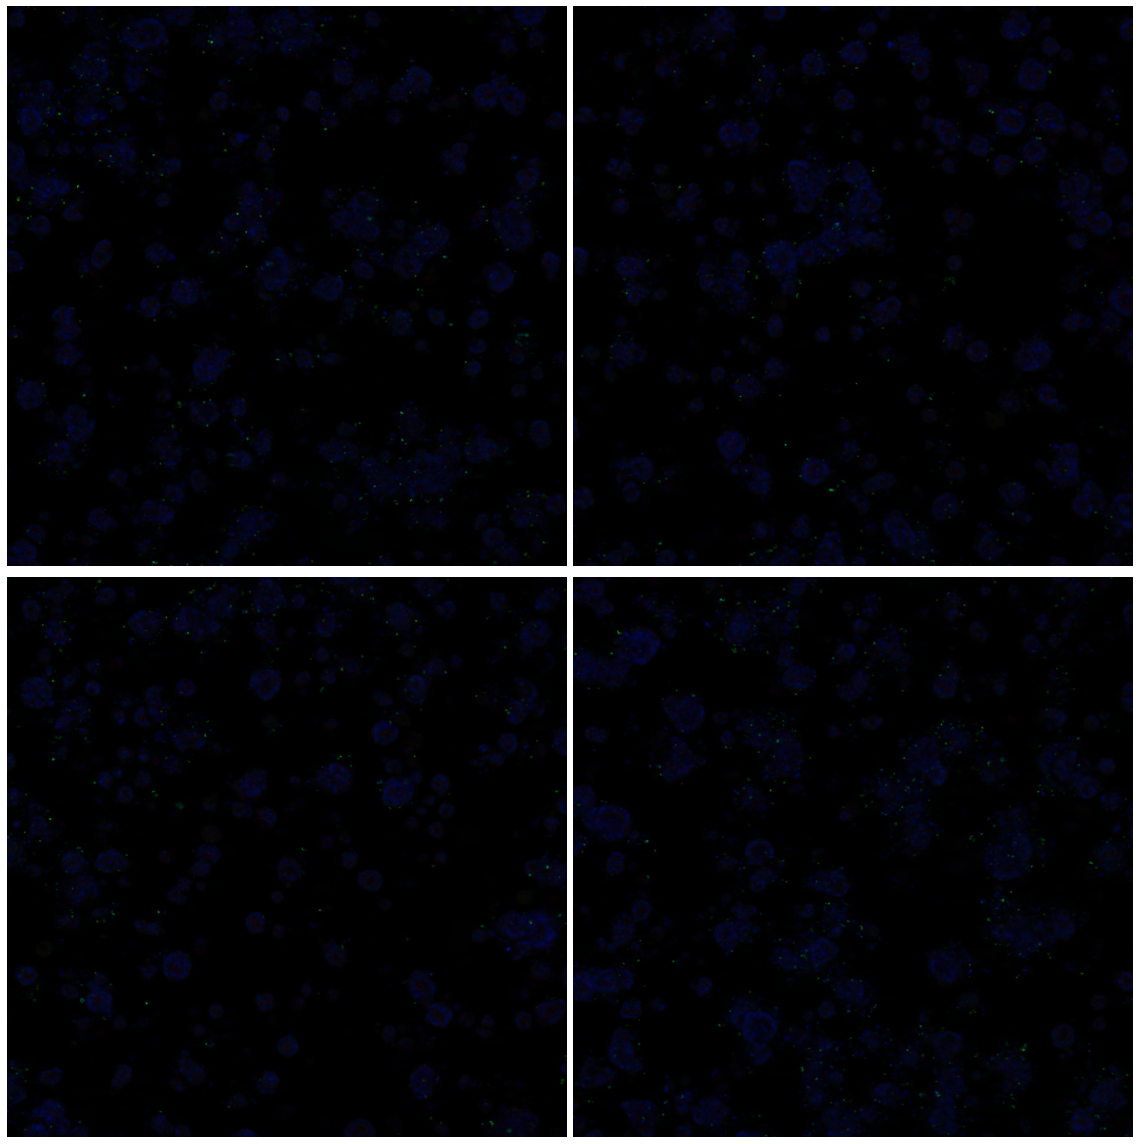

In [6]:
show_image_fields("./io/D007T01P005L08_G_16_contrastProjections.h5")

#### Segmentation

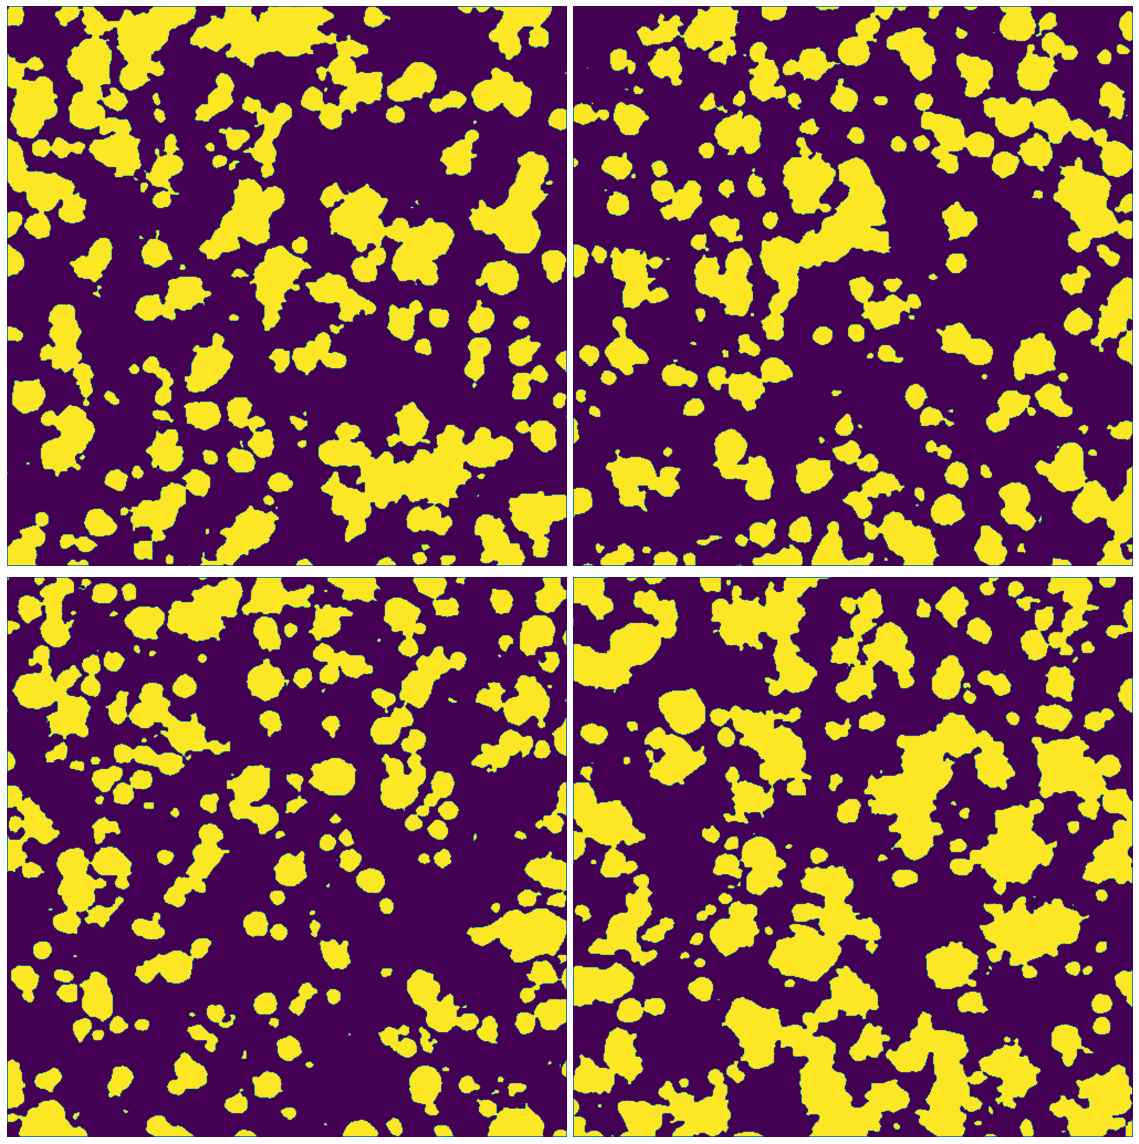

In [7]:
show_segmentation_fields("./io/D007T01P005L08_G_16_contrastProjections.h5_segmentation.h5")

### D013T01P907L08_P_02

#### Image Fields

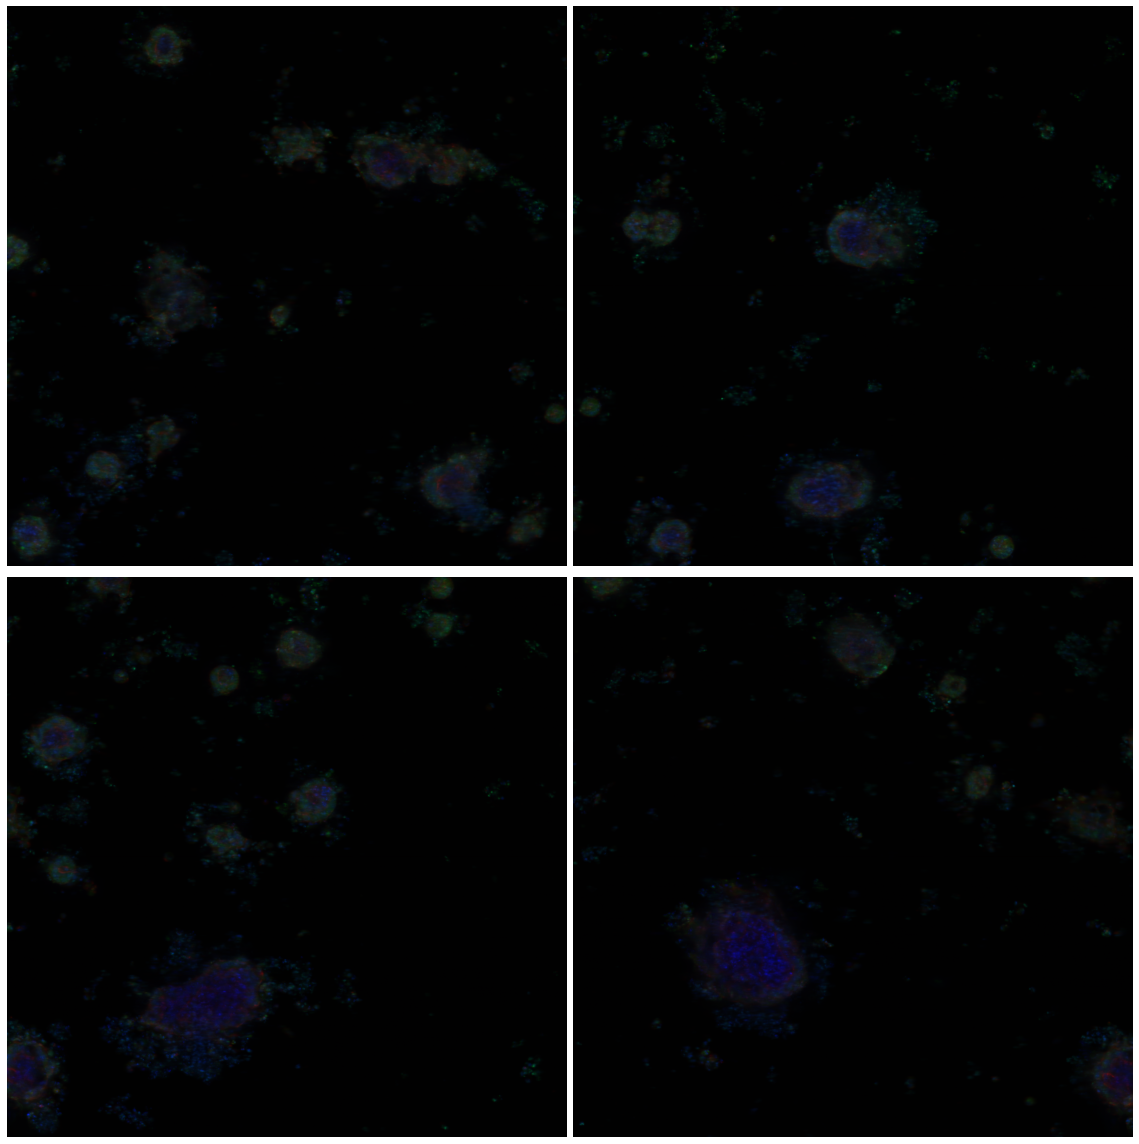

In [8]:
show_image_fields("./io/D013T01P907L08_P_02_contrastProjections.h5")

#### Segmentation

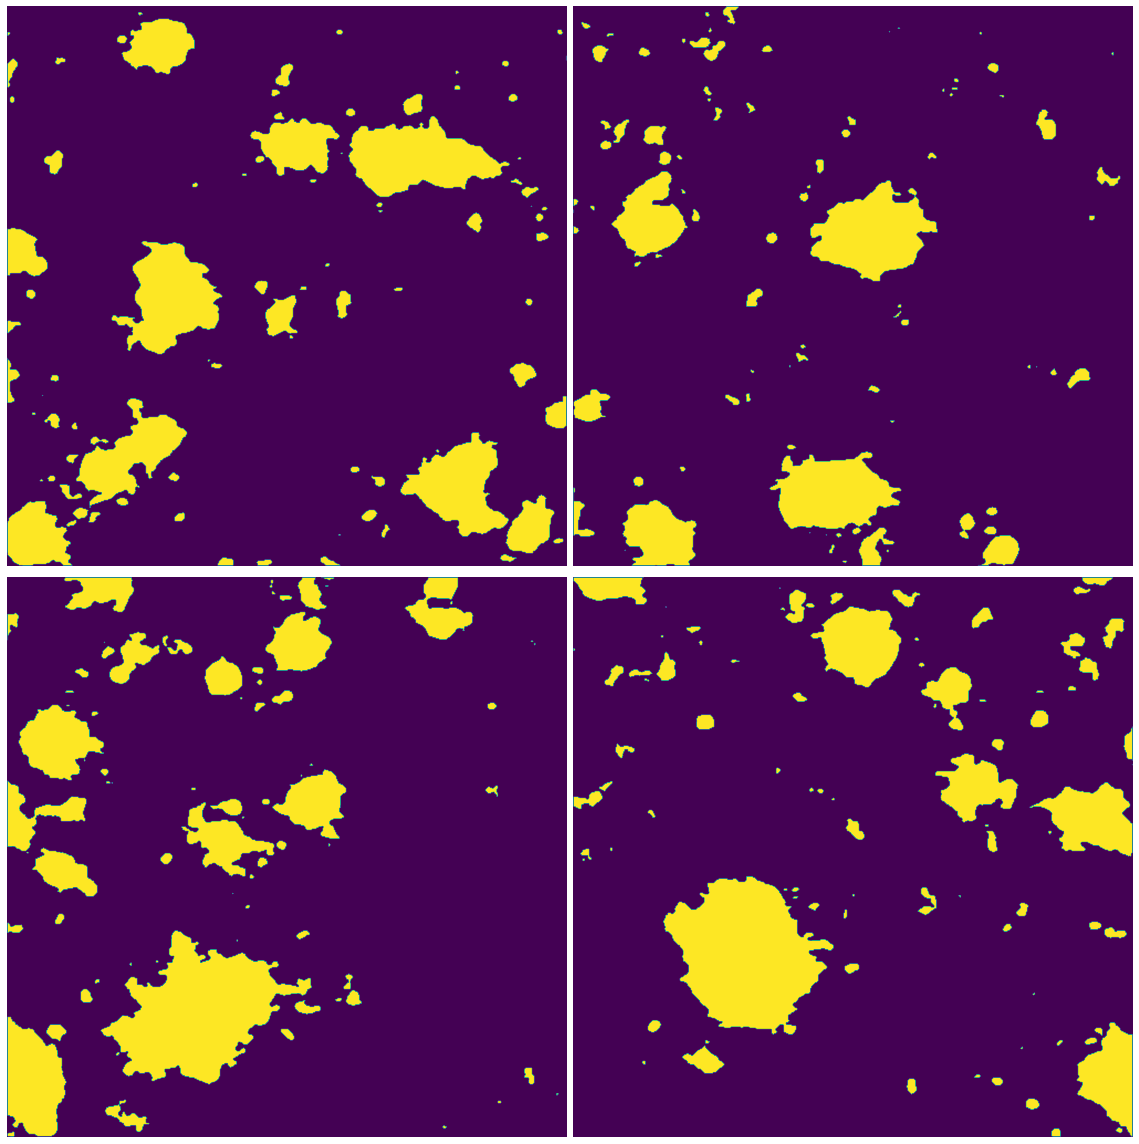

In [9]:
show_segmentation_fields("./io/D013T01P907L08_P_02_contrastProjections.h5_segmentation.h5")